In [149]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
width, height =125, 125 

In [151]:
def createRandomMatrix():
    matrix = np.random.randint(0, 255, (height, width, 3), dtype=np.uint8)
    return matrix

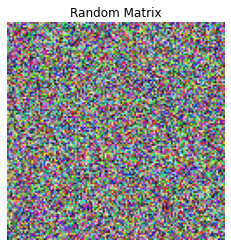

In [152]:
matrix=createRandomMatrix()
plt.title("Random Matrix")
plt.imshow(matrix)
plt.axis('off')
plt.show()


In [153]:
def createBayerFilter():
    bayer_filter = np.zeros((height, width, 3), dtype=np.uint8)
    for i in range(height):
        for j in range(width):
            if (i % 2 == 0) and (j % 2 == 0):
                bayer_filter[i, j, 1] = 255  # Green
            elif (i % 2 == 0) and (j % 2 == 1):
                bayer_filter[i, j, 0] = 255  # Blue
            elif (i % 2 == 1) and (j % 2 == 0):
                bayer_filter[i, j, 2] = 255  # Red
            else:
                bayer_filter[i, j, 1] = 255  # Green

    return bayer_filter


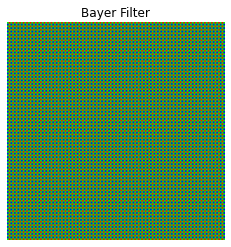

In [154]:
bayerFilter = createBayerFilter()
plt.title("Bayer Filter")
plt.imshow(bayerFilter)
plt.axis('off')
plt.show()

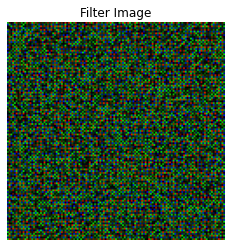

In [155]:
filter_image=bayerFilter*matrix
plt.title("Filter Image")
plt.imshow(filter_image)
plt.axis('off')
plt.show()

In [156]:
def white_balance(image):
    """Apply Gray-World white balancing to correct color balance"""
    avg_R = np.mean(image[:, :, 0])
    avg_G = np.mean(image[:, :, 1])
    avg_B = np.mean(image[:, :, 2])

    avg_gray = (avg_R + avg_G + avg_B) / 3

    scale_R = avg_gray / avg_R
    scale_G = avg_gray / avg_G
    scale_B = avg_gray / avg_B

    white_balanced = np.clip(image * [scale_R, scale_G, scale_B], 0, 255).astype(np.uint8)
    return white_balanced

In [157]:
def increaseimageBrightness(image):
    """Increase the brightness of the image"""
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)
    lim = 255 - 40
    v[v > lim] = 255
    v[v <= lim] += 40
    final_hsv = cv2.merge((h, s, v))
    image = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return image

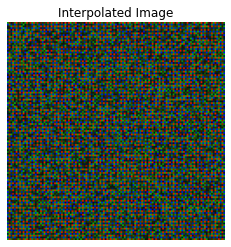

In [158]:

interpolated_image = cv2.resize(filter_image, (width, height), interpolation=cv2.INTER_LINEAR)
#apply white balnce to interpolated image
interpolated_image = white_balance(interpolated_image)
#increase brightness of interpolated image
interpolated_image = increaseimageBrightness(interpolated_image)
plt.title("Interpolated Image")
plt.imshow(interpolated_image)
plt.axis('off')
plt.show()

In [159]:
def convertToHSV(image):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    return hsv_image

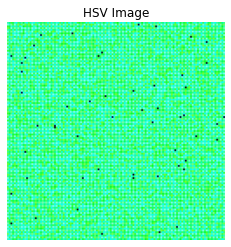

In [160]:
HSV_image = convertToHSV(interpolated_image)
hue = HSV_image[:, :, 0]
saturation = HSV_image[:, :, 1]
value = HSV_image[:, :, 2]
plt.title("HSV Image")
plt.imshow(HSV_image)
plt.axis('off')
plt.show()

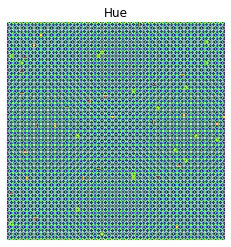

In [161]:
plt.title("Hue")
plt.imshow(hue, cmap='hsv')
plt.axis('off')
plt.show()

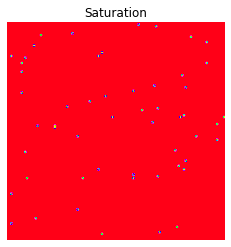

In [162]:
plt.title("Saturation")
plt.imshow(saturation, cmap='hsv')
plt.axis('off')
plt.show()

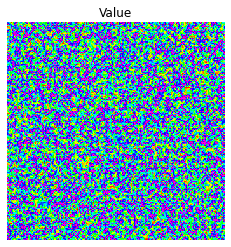

In [163]:
plt.title("Value")
plt.imshow(value, cmap='hsv')
plt.axis('off')
plt.show()
